**What is the RAG system?**

**Defination:**

This is called retrieval augmented generation (RAG), as you would retrieve the relevant data and use it as augmented context for the LLM. Instead of relying solely on knowledge derived from the training data, a RAG workflow pulls relevant information and connects static LLMs with real-time data retrieval.

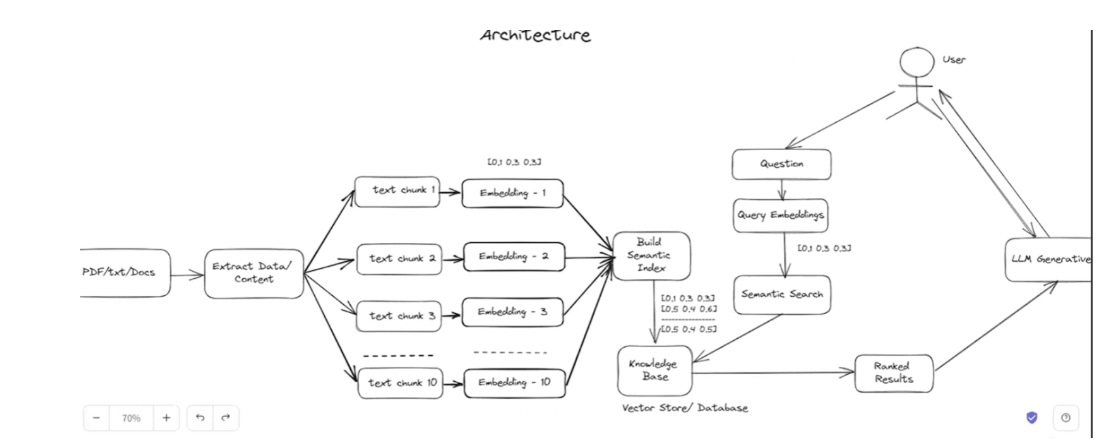

**Why we create a RAG System?**

Retrieval systems (RAG) give LLM systems access to factual, access-controlled, timely information.

* RAG REDUCES HALLUCINATION

Example: In the financial services industry, providing accurate information on investment options is crucial because it directly impacts customers' purchasing decisions and financial well-being. RAG can help ensure that the information generated about stocks, bonds, or mutual funds

* COST-EFFECTIVE ALTERNATIVE

Example: Banks often need to assess the creditworthiness of potential borrowers. Fine-tuning pre-trained language models to analyse credit histories can be resource-intensive. RAG architecture offers a cost-effective alternative by retrieving relevant financial data and credit history information from existing databases, combining this with pre-trained language models

* CREDIBLE AND ACCURATE RESPONSES

Example: In customer support, providing accurate and helpful responses is essential for maintaining customer trust, as it demonstrates the company's commitment to providing reliable information and support. The RAG technique is able to do this very effectively by retrieving data from catalogues, policies, and past customer interactions to generate context-aware insights, ensuring that customers receive reliable information on product features, returns, and other inquiries.

* DOMAIN-SPECIFIC INFORMATION

Example: In the legal industry, clients often require advice specific to their case or jurisdiction because different legal systems have unique rules and regulations, and understanding these nuances is crucial for effective legal representation. RAG can access domain-specific knowledge bases, such as local statutes and case law, to provide tailored information relevant to clients' legal needs.

https://www.advancinganalytics.co.uk/blog/2023/11/7/10-reasons-why-you-need-to-implement-rag-a-game-changer-in-ai

**RAG Practical Usecase**

- Document Question Answering Systems
- Conversational agents
- Real-time Event Commentary
- Content Generation
- Personalised Recommendation
- Virtual Assistants

In [ ]:
# Installing the necessary libraries

!pip install langchain openai tiktoken rapidocr-onnxruntime

In [ ]:
# Fetching OpenAI API key

from google.colab import userdata
OPENAI_API_KEY=userdata.get('OPENAI_API_KEY')

In [ ]:
# OPENAI_API_KEY

Setting Enviornment Variable

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

1. Data Ingestion
2. Data Reterival
3. Data Generatio

**1. Data ingestion**

https://en.wikipedia.org/wiki/State_of_the_Union#:~:text=Though%20the%20language%20of%20the,as%20late%20as%20March%207

In [ ]:
!pip install langchain-community

In [ ]:
from langchain.document_loaders import TextLoader
from langchain.vectorstores import FAISS

In [ ]:
with open("state_of_the_union.txt", "r", encoding = "utf8") as f:
  data = f.read()

In [ ]:
data

'Madam Speaker, Madam Vice President, our First Lady and Second Gentleman. Members of Congress and the Cabinet. Justices of the Supreme Court. My fellow Americans.  \n\nLast year COVID-19 kept us apart. This year we are finally together again. \n\nTonight, we meet as Democrats Republicans and Independents. But most importantly as Americans. \n\nWith a duty to one another to the American people to the Constitution. \n\nAnd with an unwavering resolve that freedom will always triumph over tyranny. \n\nSix days ago, Russia’s Vladimir Putin sought to shake the foundations of the free world thinking he could make it bend to his menacing ways. But he badly miscalculated. \n\nHe thought he could roll into Ukraine and the world would roll over. Instead he met a wall of strength he never imagined. \n\nHe met the Ukrainian people. \n\nFrom President Zelenskyy to every Ukrainian, their fearlessness, their courage, their determination, inspires the world. \n\nGroups of citizens blocking tanks with 

In [ ]:
print(data)

Madam Speaker, Madam Vice President, our First Lady and Second Gentleman. Members of Congress and the Cabinet. Justices of the Supreme Court. My fellow Americans.  

Last year COVID-19 kept us apart. This year we are finally together again. 

Tonight, we meet as Democrats Republicans and Independents. But most importantly as Americans. 

With a duty to one another to the American people to the Constitution. 

And with an unwavering resolve that freedom will always triumph over tyranny. 

Six days ago, Russia’s Vladimir Putin sought to shake the foundations of the free world thinking he could make it bend to his menacing ways. But he badly miscalculated. 

He thought he could roll into Ukraine and the world would roll over. Instead he met a wall of strength he never imagined. 

He met the Ukrainian people. 

From President Zelenskyy to every Ukrainian, their fearlessness, their courage, their determination, inspires the world. 

Groups of citizens blocking tanks with their bodies. Every

In [ ]:
loader = TextLoader("/content/state_of_the_union.txt")

In [ ]:
document = loader.load()

In [ ]:
document

[Document(metadata={'source': '/content/state_of_the_union.txt'}, page_content='Madam Speaker, Madam Vice President, our First Lady and Second Gentleman. Members of Congress and the Cabinet. Justices of the Supreme Court. My fellow Americans.  \n\nLast year COVID-19 kept us apart. This year we are finally together again. \n\nTonight, we meet as Democrats Republicans and Independents. But most importantly as Americans. \n\nWith a duty to one another to the American people to the Constitution. \n\nAnd with an unwavering resolve that freedom will always triumph over tyranny. \n\nSix days ago, Russia’s Vladimir Putin sought to shake the foundations of the free world thinking he could make it bend to his menacing ways. But he badly miscalculated. \n\nHe thought he could roll into Ukraine and the world would roll over. Instead he met a wall of strength he never imagined. \n\nHe met the Ukrainian people. \n\nFrom President Zelenskyy to every Ukrainian, their fearlessness, their courage, their

In [ ]:
print(document[0].page_content)

Madam Speaker, Madam Vice President, our First Lady and Second Gentleman. Members of Congress and the Cabinet. Justices of the Supreme Court. My fellow Americans.  

Last year COVID-19 kept us apart. This year we are finally together again. 

Tonight, we meet as Democrats Republicans and Independents. But most importantly as Americans. 

With a duty to one another to the American people to the Constitution. 

And with an unwavering resolve that freedom will always triumph over tyranny. 

Six days ago, Russia’s Vladimir Putin sought to shake the foundations of the free world thinking he could make it bend to his menacing ways. But he badly miscalculated. 

He thought he could roll into Ukraine and the world would roll over. Instead he met a wall of strength he never imagined. 

He met the Ukrainian people. 

From President Zelenskyy to every Ukrainian, their fearlessness, their courage, their determination, inspires the world. 

Groups of citizens blocking tanks with their bodies. Every

In [ ]:
print(document[0].metadata)

{'source': '/content/state_of_the_union.txt'}


**Chunking of the Data**

CharacterTextSplitter v/s RecursiveCharacterTextSplitter

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500,chunk_overlap=50)

In [ ]:
text_chunks = text_splitter.split_documents(document)

Splitting text with the default separator list of ["\n\n", "\n", " ", ""] can cause words to be split between chunks.

In [ ]:
text_chunks

[Document(metadata={'source': '/content/state_of_the_union.txt'}, page_content='Madam Speaker, Madam Vice President, our First Lady and Second Gentleman. Members of Congress and the Cabinet. Justices of the Supreme Court. My fellow Americans.  \n\nLast year COVID-19 kept us apart. This year we are finally together again. \n\nTonight, we meet as Democrats Republicans and Independents. But most importantly as Americans. \n\nWith a duty to one another to the American people to the Constitution. \n\nAnd with an unwavering resolve that freedom will always triumph over tyranny.'),
 Document(metadata={'source': '/content/state_of_the_union.txt'}, page_content='Six days ago, Russia’s Vladimir Putin sought to shake the foundations of the free world thinking he could make it bend to his menacing ways. But he badly miscalculated. \n\nHe thought he could roll into Ukraine and the world would roll over. Instead he met a wall of strength he never imagined. \n\nHe met the Ukrainian people. \n\nFrom P

In [ ]:
print(text_chunks[3].page_content)

Please rise if you are able and show that, Yes, we the United States of America stand with the Ukrainian people. 

Throughout our history we’ve learned this lesson when dictators do not pay a price for their aggression they cause more chaos.   

They keep moving.   

And the costs and the threats to America and the world keep rising.   

That’s why the NATO Alliance was created to secure peace and stability in Europe after World War 2.


In [ ]:
print(text_chunks[90].page_content)

And we will, as one people. 

One America. 

The United States of America. 

May God bless you all. May God protect our troops.


In [ ]:
len(text_chunks)

91

In [ ]:
len(document)

1

In [ ]:
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import FAISS

In [ ]:
embeddings=OpenAIEmbeddings(openai_api_key=OPENAI_API_KEY)

<ipython-input-35-dcd1e9b7db5e>:1: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embeddings=OpenAIEmbeddings(openai_api_key=OPENAI_API_KEY)


In [ ]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 55.0 MB/s eta 0:00:00


In [ ]:
vectorstore = FAISS.from_documents(text_chunks, embeddings)

RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

So openai api ka free quota option is not free anymore. So I am done. Here faiss index me chunks ki openAI llm based embeding store hona tha. But openai api not providing free tokens anymore.

Let's assume work done.

In [ ]:
retriever = vectorstore.as_retriever()

NameError: name 'vectorstore' is not defined

In [ ]:
from langchain.prompts import ChatPromptTemplate

In [ ]:
template = """You are an assistant for question-answering tasks.
Use the following pieces of retrieved context to answer the question.
If you don't know the answer, just say that you don't know.
Use ten sentences maximum and keep the answer concise.
Question: {question}
Context: {context}
Answer:
"""

In [ ]:
prompt = ChatPromptTemplate.from_template(template)

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.schema.runnable import RunnablePassthrough # dynamic parser : pass questions on the runtime
from langchain.schema.output_parser import StrOutputParser

In [ ]:
output_parser = StrOutputParser()

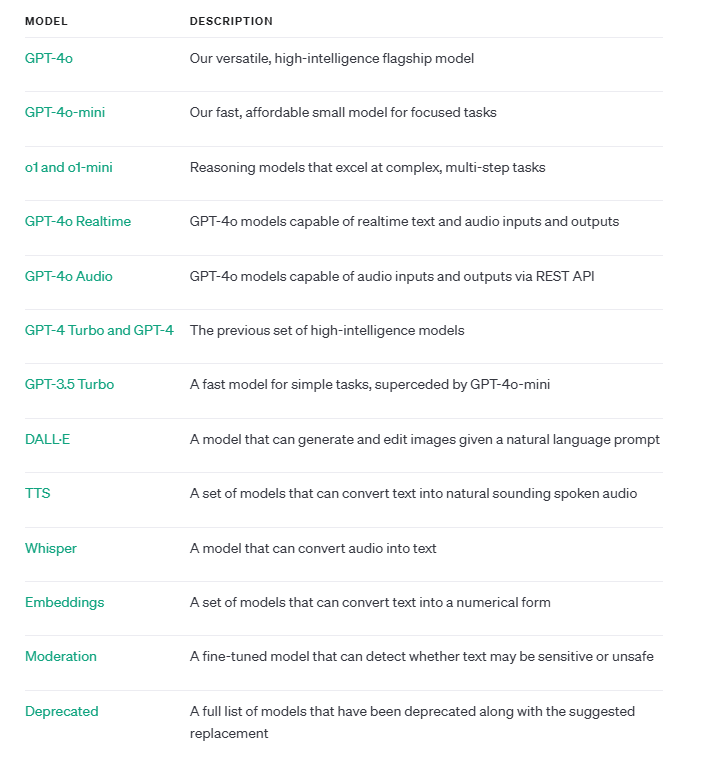

In [ ]:
llm_model = ChatOpenAI(openai_api_key=OPENAI_API_KEY,model_name="gpt-3.5-turbo")

<ipython-input-45-a8d46cb457e7>:1: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm_model = ChatOpenAI(openai_api_key=OPENAI_API_KEY,model_name="gpt-3.5-turbo")


In [ ]:
rag_chain = (
    {"context": retriever,  "question": RunnablePassthrough()}
    | prompt
    | llm_model
    | output_parser
)
# to use so many things in the simple shot

NameError: name 'retriever' is not defined

In [ ]:
rag_chain.invoke("How is the United States supporting Ukraine economically and militarily?")

NameError: name 'rag_chain' is not defined

In [ ]:
rag_chain.invoke("What action is the U.S. taking to address rising gas prices?")

NameError: name 'rag_chain' is not defined

In case someone have paid for openAI api, then responses would have come like this

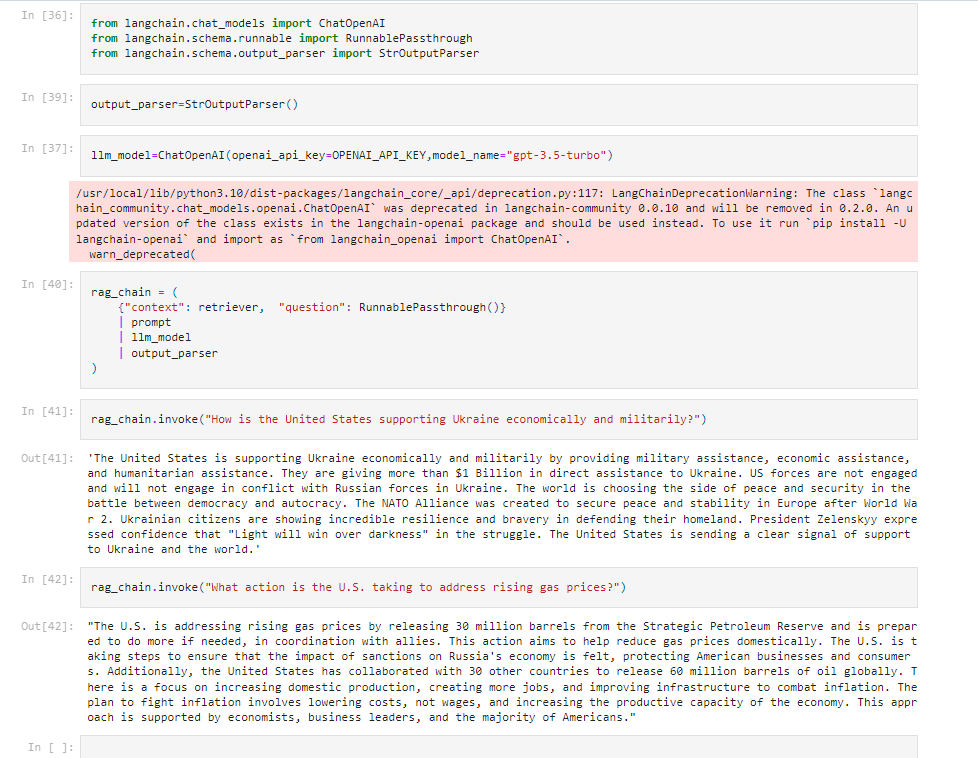



---
---
---
---

# **Understanding the whole Code**

In [ ]:
# Installing the necessary libraries
# Fill RAG Code with OpenAI & FAISS

!pip install langchain openai tiktoken rapidocr-onnxruntime

# Fetching OpenAI API key

from google.colab import userdata
OPENAI_API_KEY=userdata.get('OPENAI_API_KEY')

import os
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

!pip install langchain-community

from langchain.document_loaders import TextLoader
from langchain.vectorstores import FAISS

with open("state_of_the_union.txt", "r", encoding = "utf8") as f:
  data = f.read()

loader = TextLoader("/content/state_of_the_union.txt")

document = loader.load()

from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500,chunk_overlap=50)
text_chunks = text_splitter.split_documents(document)

from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import FAISS

embeddings = OpenAIEmbeddings(openai_api_key=OPENAI_API_KEY)

!pip install faiss-cpu

vectorstore = FAISS.from_documents(text_chunks, embeddings)
retriever = vectorstore.as_retriever()

from langchain.prompts import ChatPromptTemplate

template = """You are an assistant for question-answering tasks.
Use the following pieces of retrieved context to answer the question.
If you don't know the answer, just say that you don't know.
Use ten sentences maximum and keep the answer concise.
Question: {question}
Context: {context}
Answer:
"""

prompt = ChatPromptTemplate.from_template(template)
from langchain.chat_models import ChatOpenAI
from langchain.schema.runnable import RunnablePassthrough # dynamic parser : pass questions on the runtime
from langchain.schema.output_parser import StrOutputParser

output_parser = StrOutputParser()

llm_model = ChatOpenAI(openai_api_key=OPENAI_API_KEY,model_name="gpt-3.5-turbo")

rag_chain = (
    {"context": retriever,  "question": RunnablePassthrough()}
    | prompt
    | llm_model
    | output_parser
)
# to use so many things in the simple shot

rag_chain.invoke("How is the United States supporting Ukraine economically and militarily?")

Here is a detailed breakdown of the RAG (Retrieval-Augmented Generation) code you shared:

---

### **1. Installing the necessary libraries**

```python
!pip install langchain openai tiktoken rapidocr-onnxruntime
!pip install langchain-community
!pip install faiss-cpu
```

- **Purpose**: Install the required libraries for:
  - **`langchain`**: Framework for building applications with language models.
  - **`openai`**: Interface for OpenAI's GPT models.
  - **`tiktoken`**: Tokenizer library optimized for OpenAI models.
  - **`rapidocr-onnxruntime`**: OCR library (not directly used here but might be for document preprocessing).
  - **`faiss-cpu`**: Vector database library for fast similarity search.

---

### **2. Fetching the OpenAI API Key**

```python
from google.colab import userdata
OPENAI_API_KEY=userdata.get('OPENAI_API_KEY')

import os
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY
```

- **Purpose**: Fetch and set the OpenAI API key securely from Colab's `userdata`. This is required to authenticate your requests to OpenAI's APIs.

---

### **3. Loading the Text Data**

```python
from langchain.document_loaders import TextLoader

loader = TextLoader("/content/state_of_the_union.txt")
document = loader.load()
```

- **Purpose**: Use `TextLoader` to load a text document (`state_of_the_union.txt`) into a `Document` object.
- **`document`**: This now holds the entire text content for further processing.

---

### **4. Splitting the Document into Chunks**

```python
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=500,chunk_overlap=50)
text_chunks = text_splitter.split_documents(document)
```

- **Purpose**: Divide the text into smaller chunks of 500 characters with an overlap of 50 characters for better contextual representation during retrieval.
- **Why overlap?** It ensures continuity of context between chunks to avoid loss of critical information when splitting.

---

### **5. Generating Embeddings and Storing as Vectors**

```python
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import FAISS

embeddings = OpenAIEmbeddings(openai_api_key=OPENAI_API_KEY)
vectorstore = FAISS.from_documents(text_chunks, embeddings)
```

- **Purpose**: Convert the text chunks into high-dimensional vectors using `OpenAIEmbeddings` (via OpenAI API) and store them in a FAISS vector store.
  - **Embeddings**: Represent the semantic meaning of text chunks.
  - **FAISS**: A library for efficient similarity search that stores these embeddings for retrieval.

---

### **6. Setting Up a Retriever**

```python
retriever = vectorstore.as_retriever()
```

- **Purpose**: Configure the FAISS vector store to act as a retriever, allowing it to fetch the most relevant chunks of text based on a query.

---

### **7. Defining the Prompt Template**

```python
from langchain.prompts import ChatPromptTemplate

template = """You are an assistant for question-answering tasks.
Use the following pieces of retrieved context to answer the question.
If you don't know the answer, just say that you don't know.
Use ten sentences maximum and keep the answer concise.
Question: {question}
Context: {context}
Answer:
"""
prompt = ChatPromptTemplate.from_template(template)
```

- **Purpose**: Define a structured prompt that guides the language model (LLM) on how to generate answers:
  - Use retrieved context to answer the question.
  - If the context is insufficient, explicitly say so.
  - Restrict the response to ten sentences and keep it concise.

---

### **8. Configuring the LLM and Output Parsing**

```python
from langchain.chat_models import ChatOpenAI
from langchain.schema.output_parser import StrOutputParser

llm_model = ChatOpenAI(openai_api_key=OPENAI_API_KEY, model_name="gpt-3.5-turbo")
output_parser = StrOutputParser()
```

- **Purpose**:
  - **`ChatOpenAI`**: Set up OpenAI's GPT-3.5-turbo model for question-answering.
  - **`StrOutputParser`**: Ensures the output is parsed and returned as plain text.

---

### **9. Setting Up the RAG Chain**

```python
from langchain.schema.runnable import RunnablePassthrough

rag_chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | prompt
    | llm_model
    | output_parser
)
```

- **Purpose**: Configure a RAG pipeline that combines:
  1. **Retriever**: Fetches relevant context from the FAISS vector store.
  2. **Prompt Template**: Inserts the question and retrieved context into the predefined prompt.
  3. **LLM Model**: Generates an answer using GPT-3.5-turbo.
  4. **Output Parser**: Ensures the output is clean text.

- **`RunnablePassthrough`**: Allows dynamic parsing of the question at runtime.

---

### **10. Invoking the RAG Chain**

```python
rag_chain.invoke("How is the United States supporting Ukraine economically and militarily?")
```

- **Purpose**: Pass a query to the RAG pipeline and get an answer based on the retrieved context from the document.

---

### **Summary of Workflow**

1. **Load** the text document and split it into manageable chunks.
2. **Embed** these chunks into vectors and store them in FAISS for retrieval.
3. Configure a **retriever** to fetch relevant chunks based on a query.
4. Define a **prompt template** to structure the interaction with the LLM.
5. Set up the **RAG chain** to retrieve, process, and generate an answer dynamically.
6. Use the RAG pipeline by invoking it with a specific question.

Would you like further elaboration or help running this pipeline?